### Project Overview

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

### Problem Statement

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

## Dataset Analysis

In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np


In [ ]:
%%capture
!pip install catboost
!pip install pingouin

In [ ]:
# Data manipulation
#==============================================================================
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Stats
#==============================================================================
from scipy import stats
import statsmodels.api as sm
import pingouin as pg

# Data visualization
#==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
#===============================================================================
from sklearn.model_selection import train_test_split as tts

# warnings
#===============================================================================
import warnings
warnings.filterwarnings("ignore")

### Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis.

In [ ]:
df = pd.read_csv('/content/apple_quality.csv')

### Data Description and Exploratory Visualisations

In [ ]:
df.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

In [ ]:
# Dataset columns
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
# Dataset header
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

> The dataset contains several numerical and one categorical column providing information on apple quality.

In [ ]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 4001
Columns: 9


In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness'], object: ['Acidity', 'Quality']}

In [ ]:
# Columns datatypes and missign values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


### **EDA**

In [ ]:
data = df.drop("A_id", axis = 1)
data.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

from matplotlib import pyplot as plt
_df_0['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sweetness'].plot(kind='hist', bins=20, title='Sweetness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Crunchiness'].plot(kind='hist', bins=20, title='Crunchiness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Acidity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Size', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Weight', y='Sweetness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Sweetness', y='Crunchiness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Crunchiness', y='Juiciness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Sweetness'].plot(kind='line', figsize=(8, 4), title='Sweetness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Crunchiness'].plot(kind='line', figsize=(8, 4), title='Crunchiness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Quality'].value_counts()
    for x_label, grp in _df_14.groupby('Acidity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Acidity')
_ = plt.ylabel('Quality')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Acidity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Size', y='Acidity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Size', y='Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Acidity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Weight', y='Acidity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Weight', y='Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

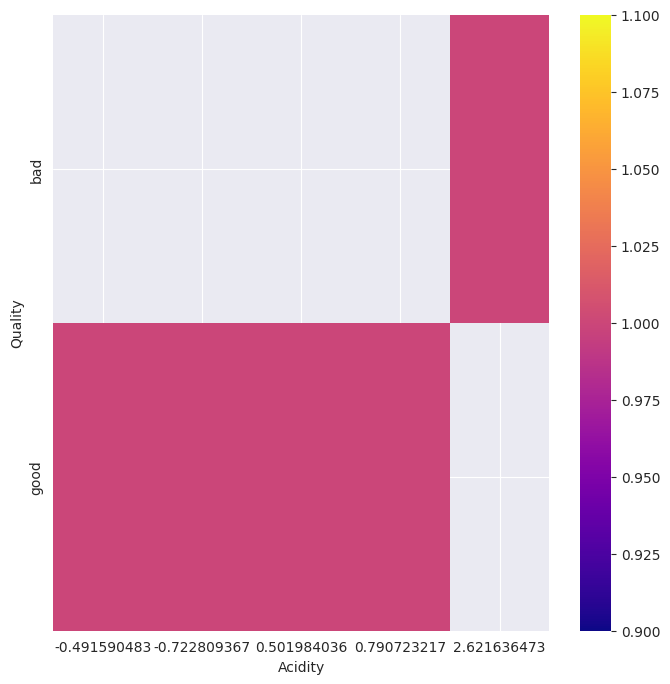

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Quality'].value_counts()
    for x_label, grp in _df_14.groupby('Acidity')
})
sns.heatmap(df_2dhist, cmap='plasma')
plt.xlabel('Acidity')
_ = plt.ylabel('Quality')

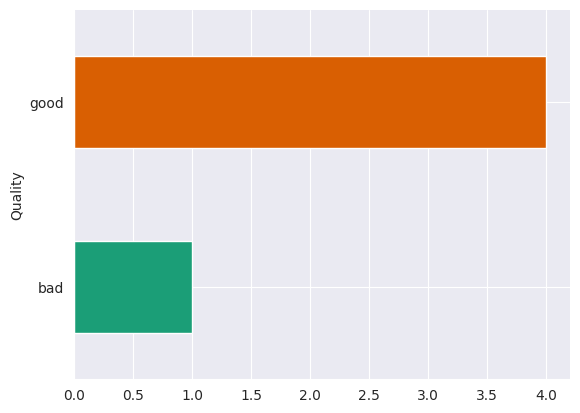

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

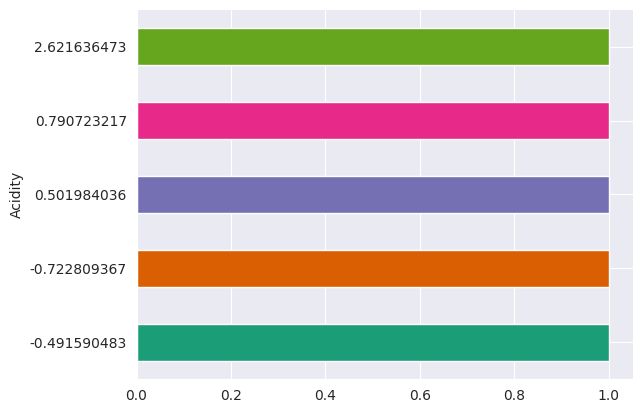

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Acidity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

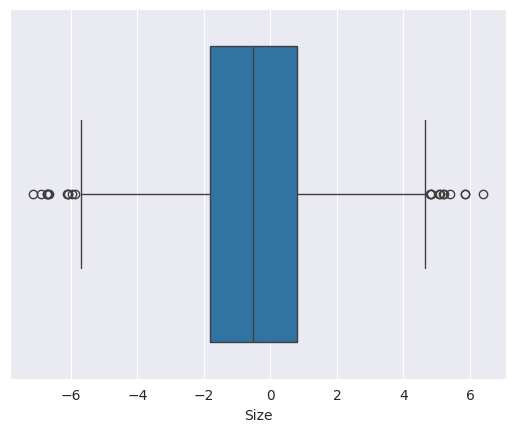

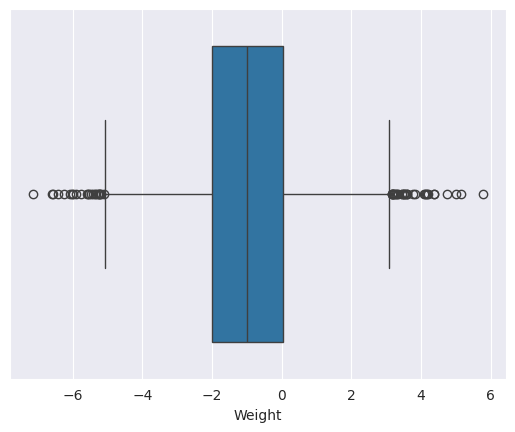

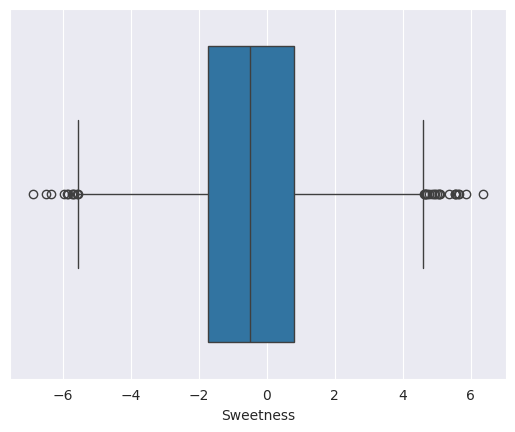

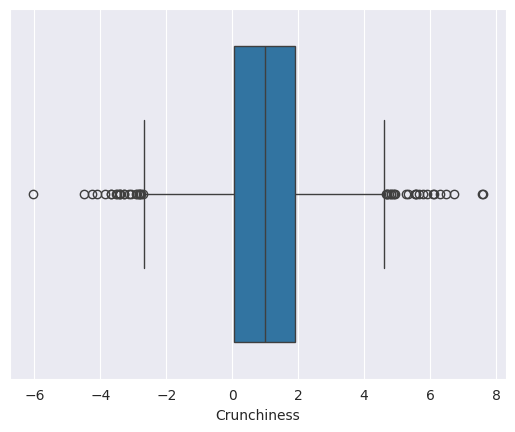

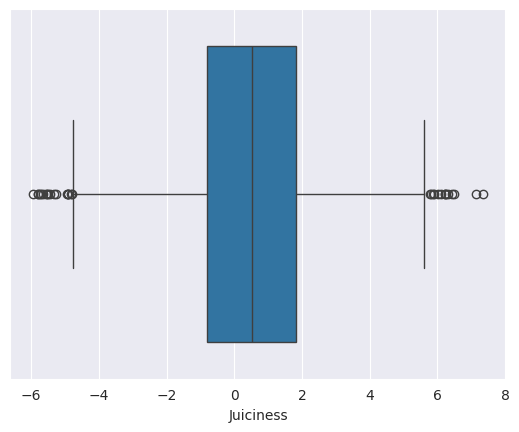

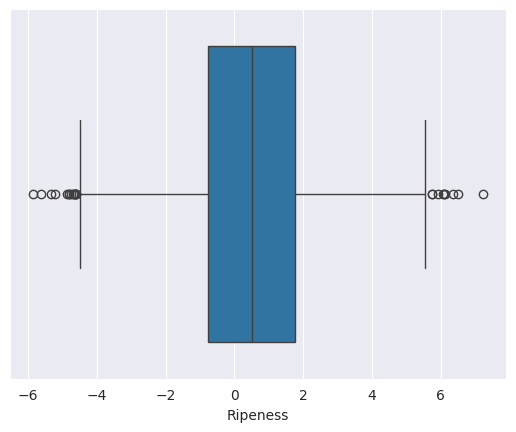

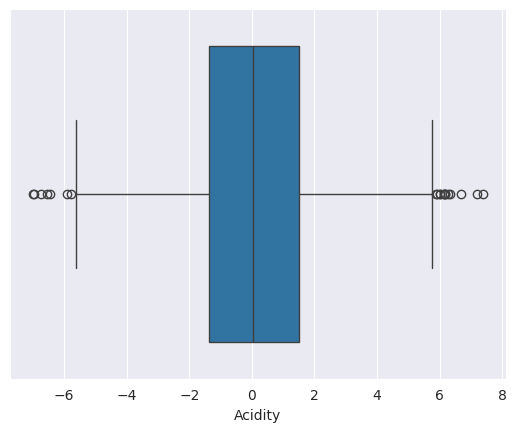

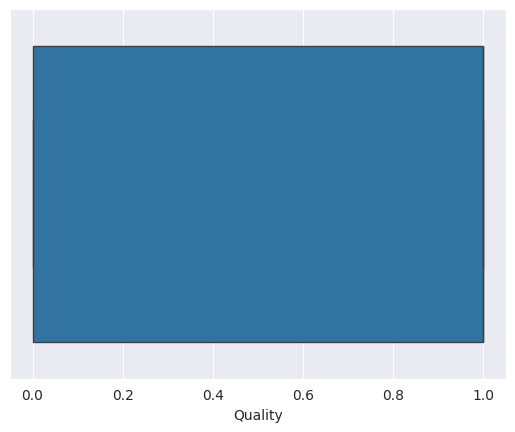

In [ ]:
# prompt: generate all plots code for the data frame

import seaborn as sns
import matplotlib.pyplot as plt

# Generate a boxplot for each numerical column
for col in data.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=data[col])
    plt.show()


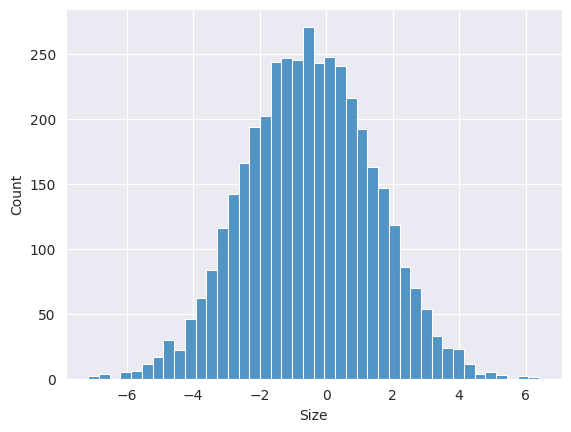

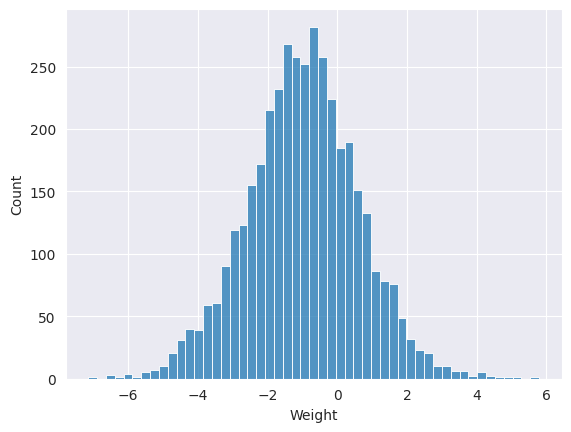

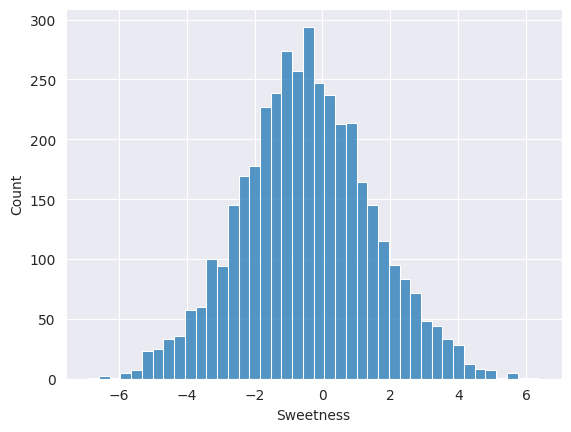

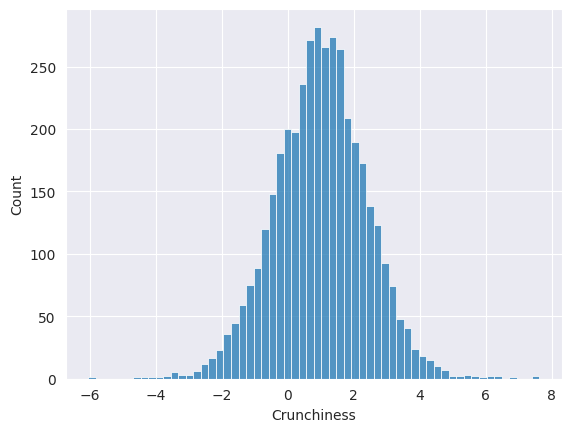

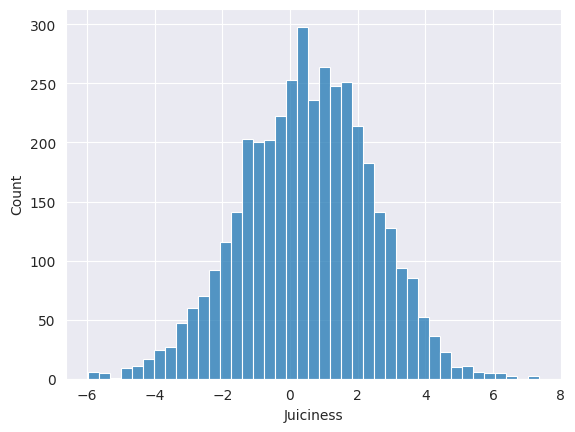

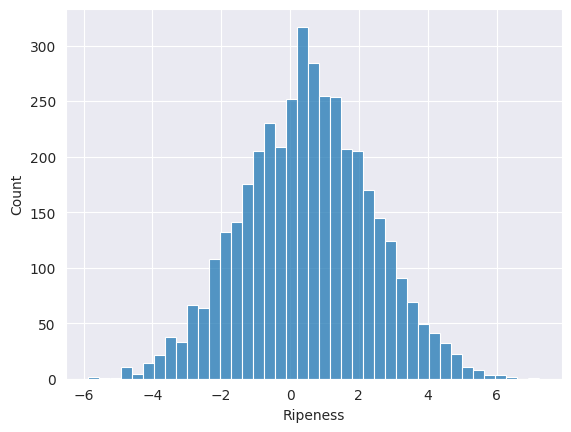

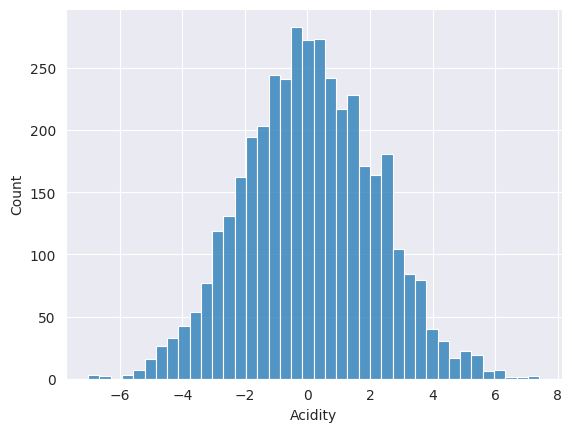

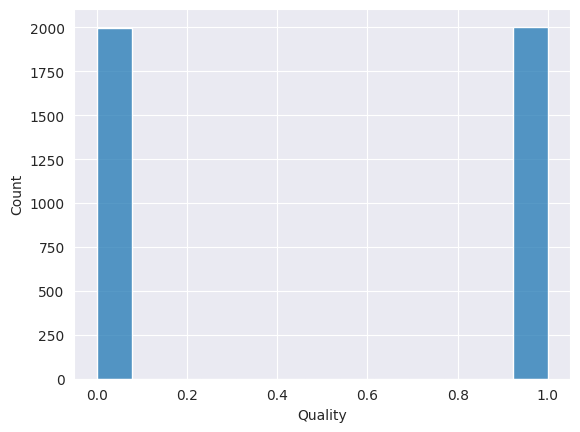

In [ ]:
# Generate a histogram for each numerical column
for col in data.select_dtypes(include=['int64', 'float64']):
    sns.histplot(x=data[col])
    plt.show()

In [ ]:
# Convert the "Acidity" column to float type.
# This will generate a NaN value since there is a string that could not be
# convert to float type.
data['Acidity'] = pd.to_numeric(data['Acidity'], errors = 'coerce')

**Duplicate rows**



In [ ]:
print(f'Total duplicate rows: {data.duplicated().sum()}')

Total duplicate rows: 0


**Missing** **values**

In [ ]:
df_null_values = data.isnull().sum().to_frame().rename(columns = {0:'count'})
df_null_values['%'] = (df_null_values['count'] / len(data)) * 100.
df_null_values = df_null_values.sort_values('%', ascending = False)
df_null_values

count         %
Size             1  0.024994
Weight           1  0.024994
Sweetness        1  0.024994
Crunchiness      1  0.024994
Juiciness        1  0.024994
Ripeness         1  0.024994
Acidity          1  0.024994
Quality          1  0.024994

In [ ]:
# We look for where the missing values ​​are located.
data[data.isnull().any(axis = 1)]

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
4000   NaN     NaN        NaN          NaN        NaN       NaN      NaN   

     Quality  
4000     NaN

**Removing Null Values**

In [ ]:
# Because it's only one row, we're going to proceed to delete it.
data = data.dropna(ignore_index = True)

# We check that there are no longer missing values.
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

**Univariate Analysis**

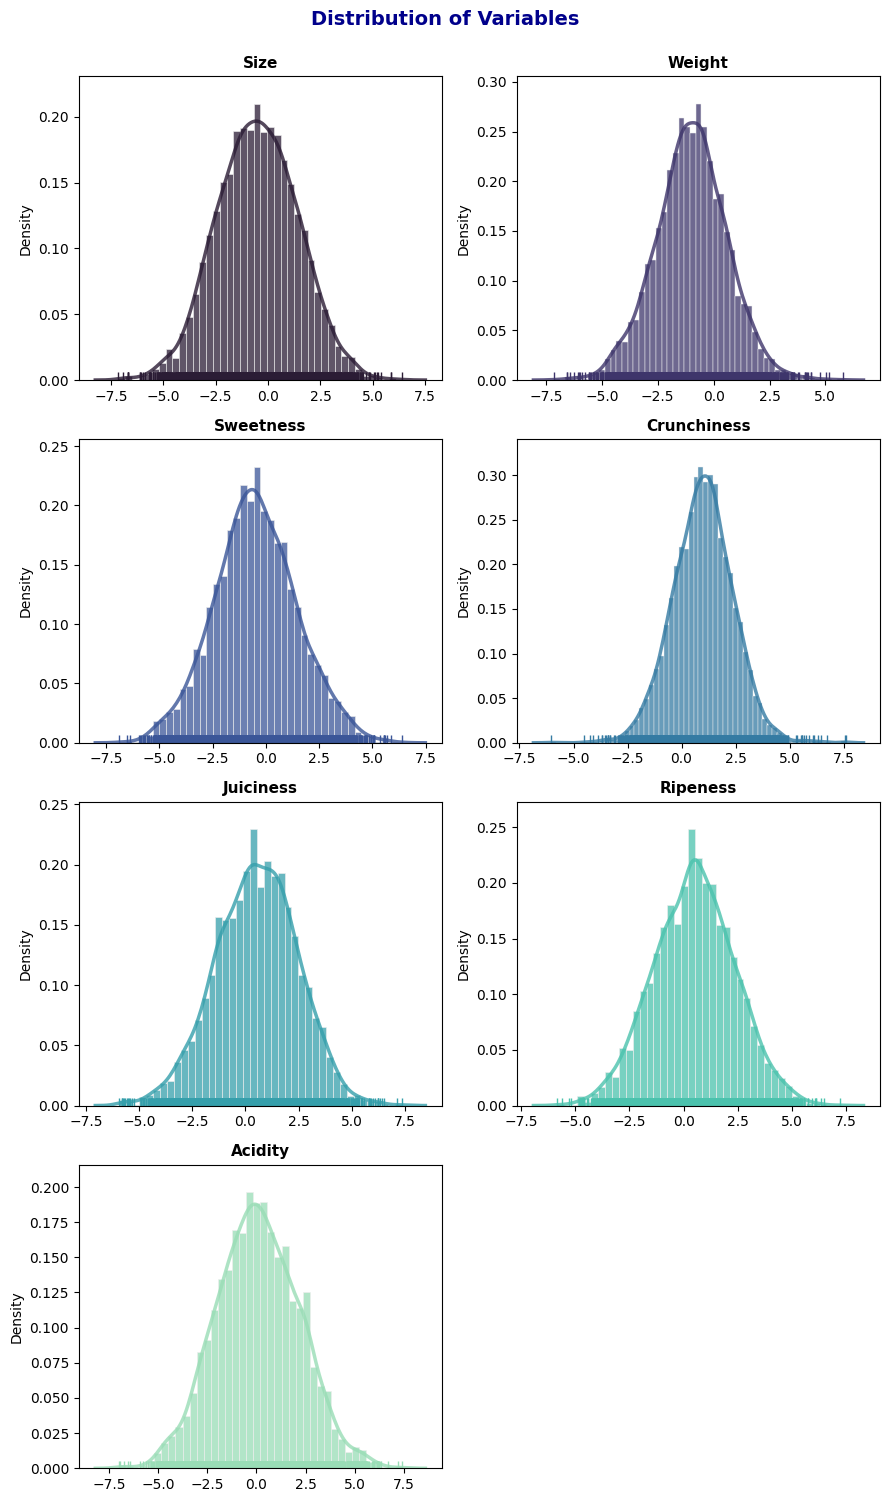

In [ ]:
cols = data.columns.to_list()[:-1]
colors = sns.color_palette('mako', len(cols))

fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (9,15))
plt.style.use("ggplot")
axs= axs.flat

for i,col in enumerate(cols):
    sns.kdeplot(data, x = col, alpha = 0.8, linewidth = 2.5, color = colors[i], ax = axs[i])
    sns.histplot(data, x = col, stat = 'density', color = colors[i], ax = axs[i])
    sns.rugplot(data, x = col, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, fontsize = 11, fontweight = "bold", color = "black")

fig.suptitle("Distribution of Variables", fontsize = 14, fontweight = "bold", color = "darkblue", y = 0.998)
fig.delaxes(ax = axs[7])
fig.tight_layout()
fig.show()

In [ ]:
# Descriptive statistics
data[cols].describe().T

count      mean       std       min       25%       50%  \
Size         4000.0 -0.503015  1.928059 -7.151703 -1.816765 -0.513703   
Weight       4000.0 -0.989547  1.602507 -7.149848 -2.011770 -0.984736   
Sweetness    4000.0 -0.470479  1.943441 -6.894485 -1.738425 -0.504758   
Crunchiness  4000.0  0.985478  1.402757 -6.055058  0.062764  0.998249   
Juiciness    4000.0  0.512118  1.930286 -5.961897 -0.801286  0.534219   
Ripeness     4000.0  0.498277  1.874427 -5.864599 -0.771677  0.503445   
Acidity      4000.0  0.076877  2.110270 -7.010538 -1.377424  0.022609   

                  75%       max  
Size         0.805526  6.406367  
Weight       0.030976  5.790714  
Sweetness    0.801922  6.374916  
Crunchiness  1.894234  7.619852  
Juiciness    1.835976  7.364403  
Ripeness     1.766212  7.237837  
Acidity      1.510493  7.404736

In [ ]:
print('-----------------------------------------------------')
print(' '*10, 'Kurtosis and Skewness')
print('-----------------------------------------------------')
for col in cols:
    print(f'* {col}: Kurtosis: {stats.kurtosis(data[col]):.4f}| Skewness: {stats.skew(data[col]):.4f}')

-----------------------------------------------------
           Kurtosis and Skewness
-----------------------------------------------------
* Size: Kurtosis: -0.0847| Skewness: -0.0024
* Weight: Kurtosis: 0.3571| Skewness: 0.0031
* Sweetness: Kurtosis: 0.0130| Skewness: 0.0838
* Crunchiness: Kurtosis: 0.7196| Skewness: 0.0002
* Juiciness: Kurtosis: 0.0272| Skewness: -0.1134
* Ripeness: Kurtosis: -0.0733| Skewness: -0.0088
* Acidity: Kurtosis: -0.0948| Skewness: 0.0558


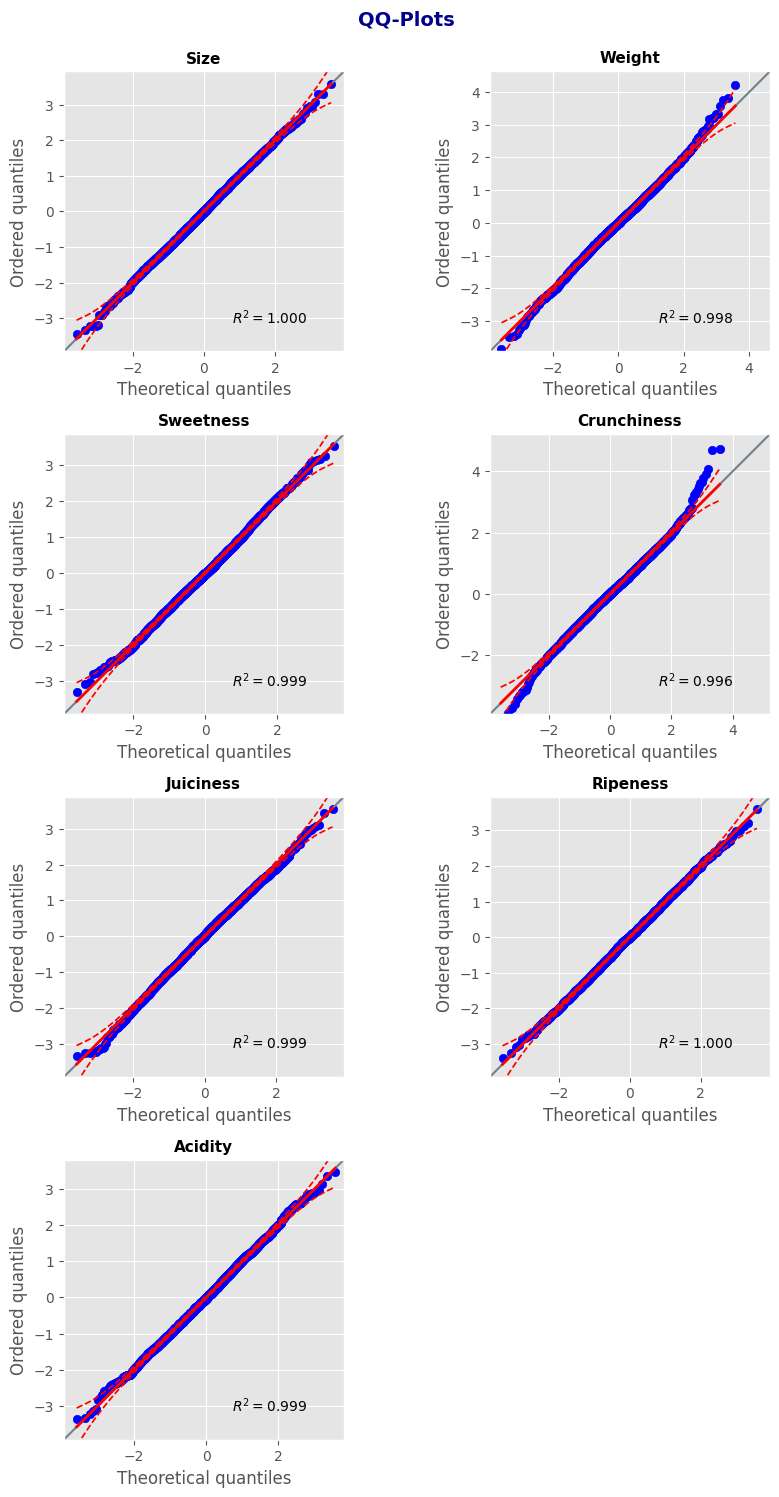

In [ ]:
fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (9, 15))
axs = axs.flat

for i,col in enumerate(cols):
    pg.qqplot(data[col],  ax = axs[i])
    axs[i].set_title(col, fontsize = 11, fontweight = "bold", color = "black")

fig.suptitle("QQ-Plots", fontsize = 14, fontweight = "bold", color = "darkblue", y = 0.995)
fig.delaxes(ax = axs[7])
fig.tight_layout()
fig.show()

**Normality** **Test**

In [ ]:
def normality_test(name:str):
    p_value = stats.normaltest(data[name])[1]
    decision = "No Normal Distribution" if p_value < 0.05 else "Normal Distribution"
    return decision

In [ ]:
print("--------------------------------------------")
print(" "*5, "Normal Test: D' Agostino")
print("--------------------------------------------")
for col in cols:
    print(f'* {col}: {normality_test(col)}')

--------------------------------------------
      Normal Test: D' Agostino
--------------------------------------------
* Size: Normal Distribution
* Weight: No Normal Distribution
* Sweetness: Normal Distribution
* Crunchiness: No Normal Distribution
* Juiciness: No Normal Distribution
* Ripeness: Normal Distribution
* Acidity: Normal Distribution


According to the normality test, we have only 4 variables that come from a population with a Normal Distribution and they are the following:

*   Size
*   Sweetness
*   Ripeness
*   Acidity

Let's look at the class distribution of the target variable.

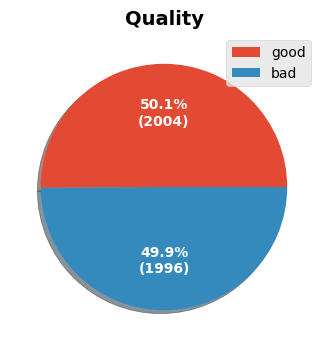

In [ ]:
df_quality = data['Quality'].value_counts().to_frame()
labels = df_quality.index.to_list()
values = df_quality.iloc[:,0].to_list()

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (4,4))
ax.pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'})
ax.legend(labels)
ax.set_title("Quality", fontsize = 14, fontweight = "bold", color = "black")
fig.show()

We see that the class distribution is balanced, so we will use accuracy as a metric.

Bivariate Analysis

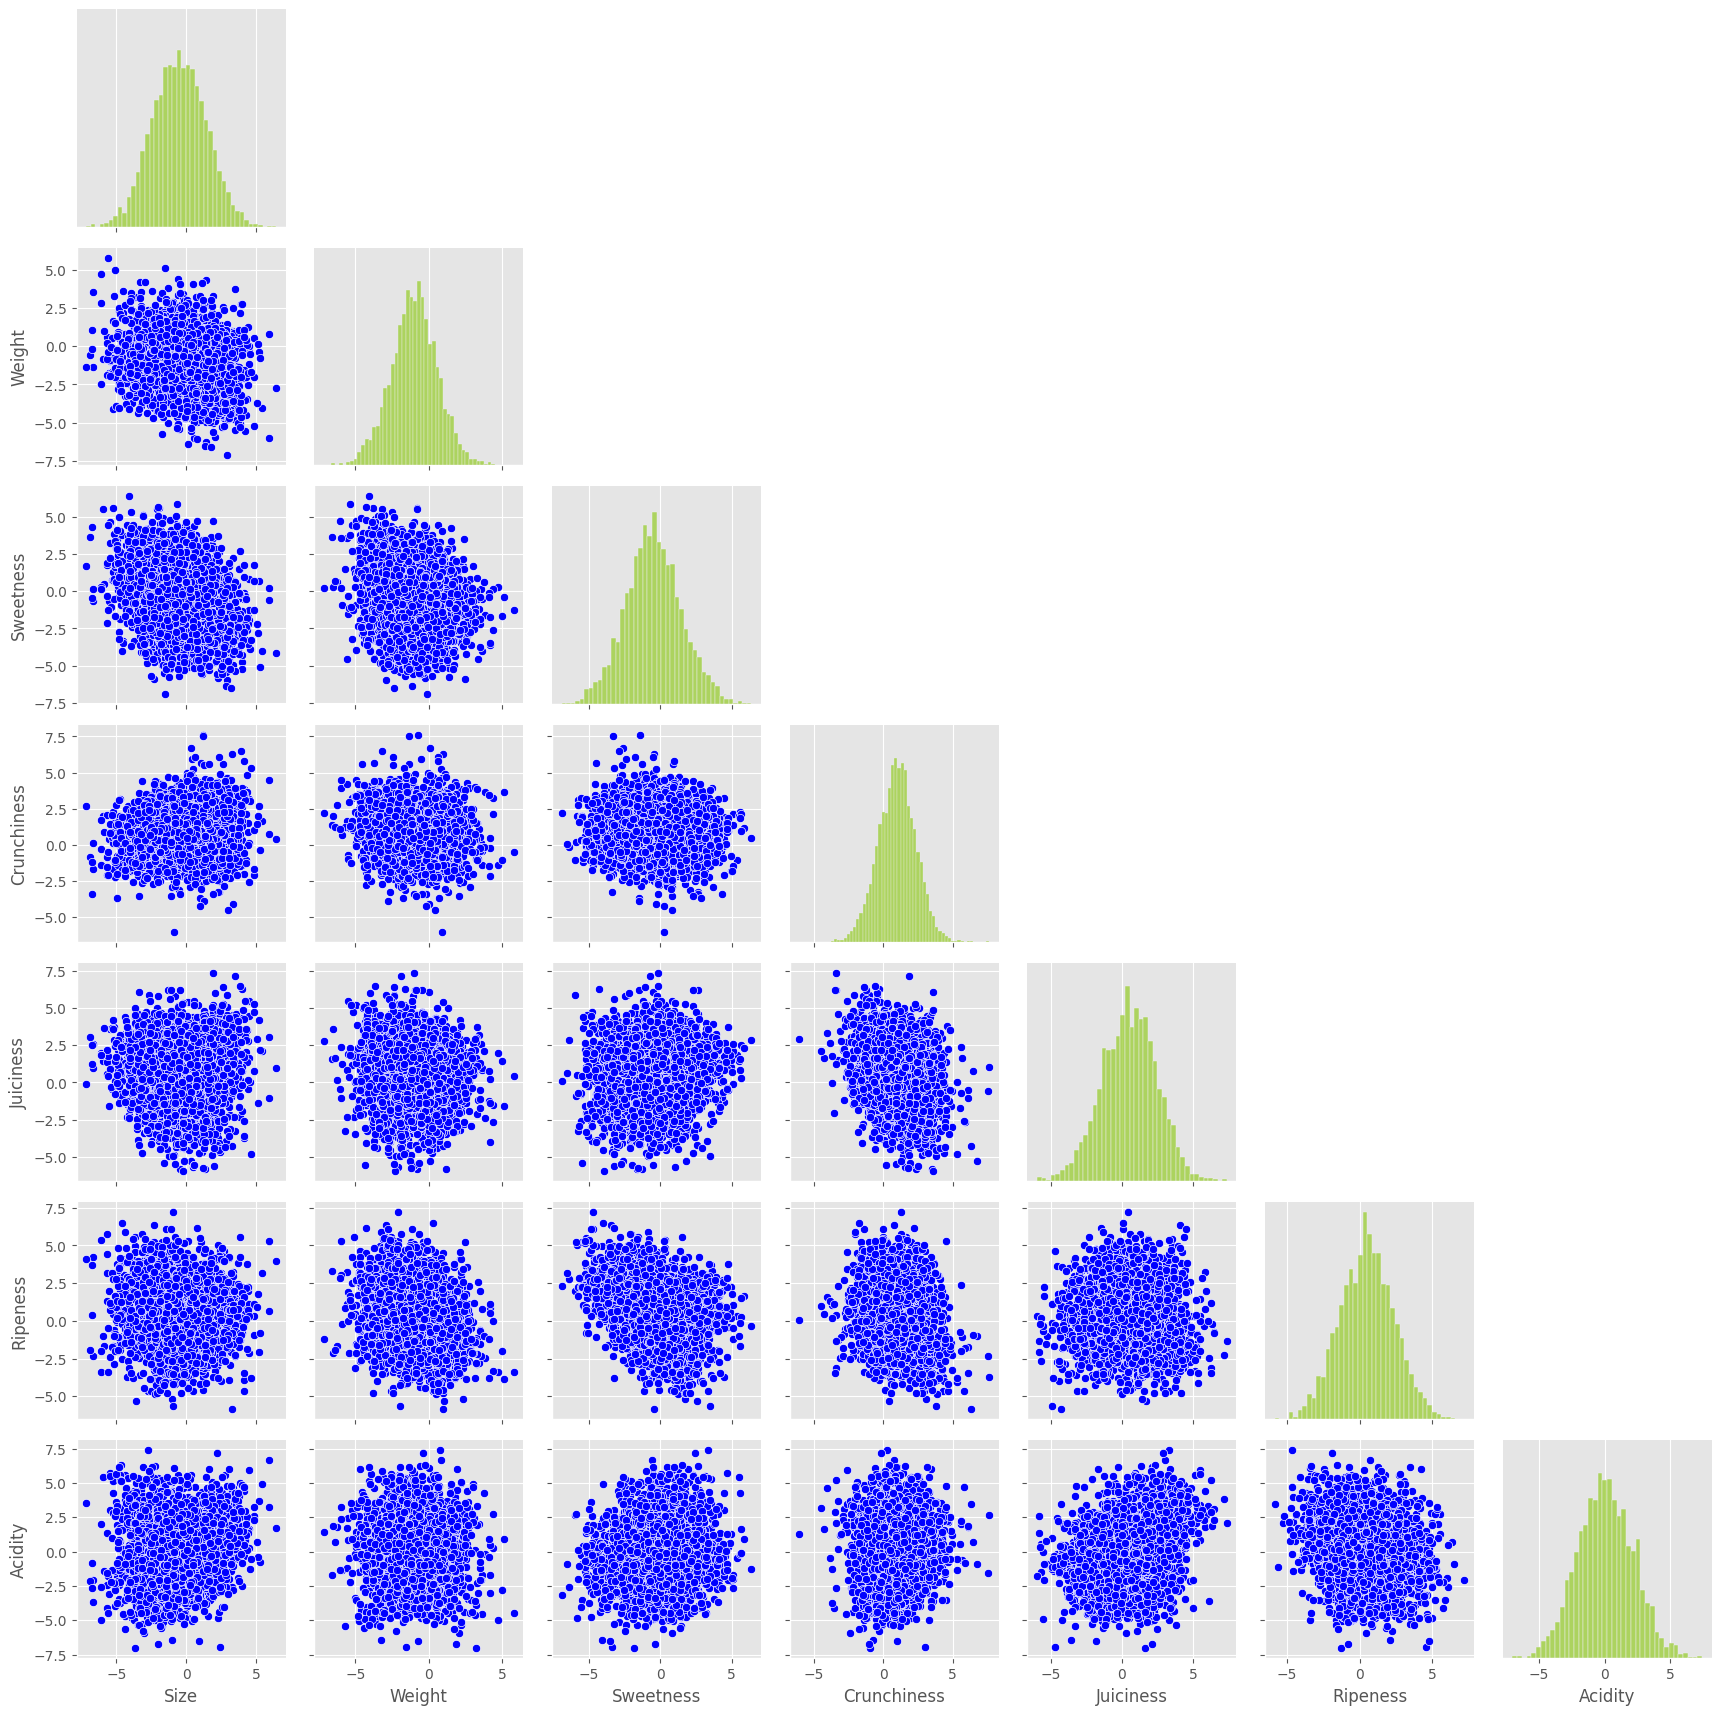

In [ ]:
g = sns.PairGrid(data, corner = True)
g.map_lower(sns.scatterplot, color = 'blue')
g.map_diag(sns.histplot, color = 'yellowgreen')
g.fig.show()

According to the graph shown we can see that no pair of variables presents a correlation, we are going to create the correlation matrix, according to the result of the normality test, we only have 4 variables that come from a population with a Normal Distribution and the rest do not, so Therefore we will use a Spearman Correlation.

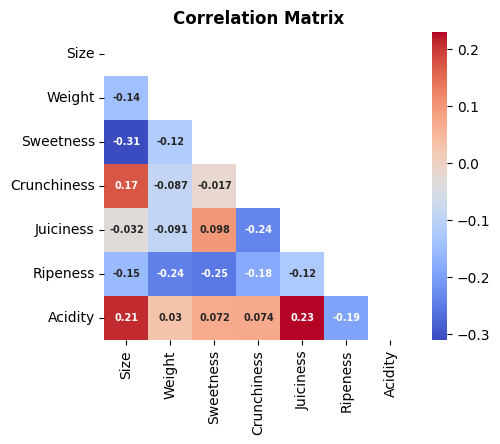

In [ ]:
corr_matrix = data[cols].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (5,4))
plt.style.use('default')
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize':7, 'fontweight':'bold'}, square = True, mask = mask)
plt.title("Correlation Matrix", fontsize = 12, fontweight = "bold")
plt.show()


According to the Correlation Matrix, no pair of variables presents a strong correlation to be taken into account.

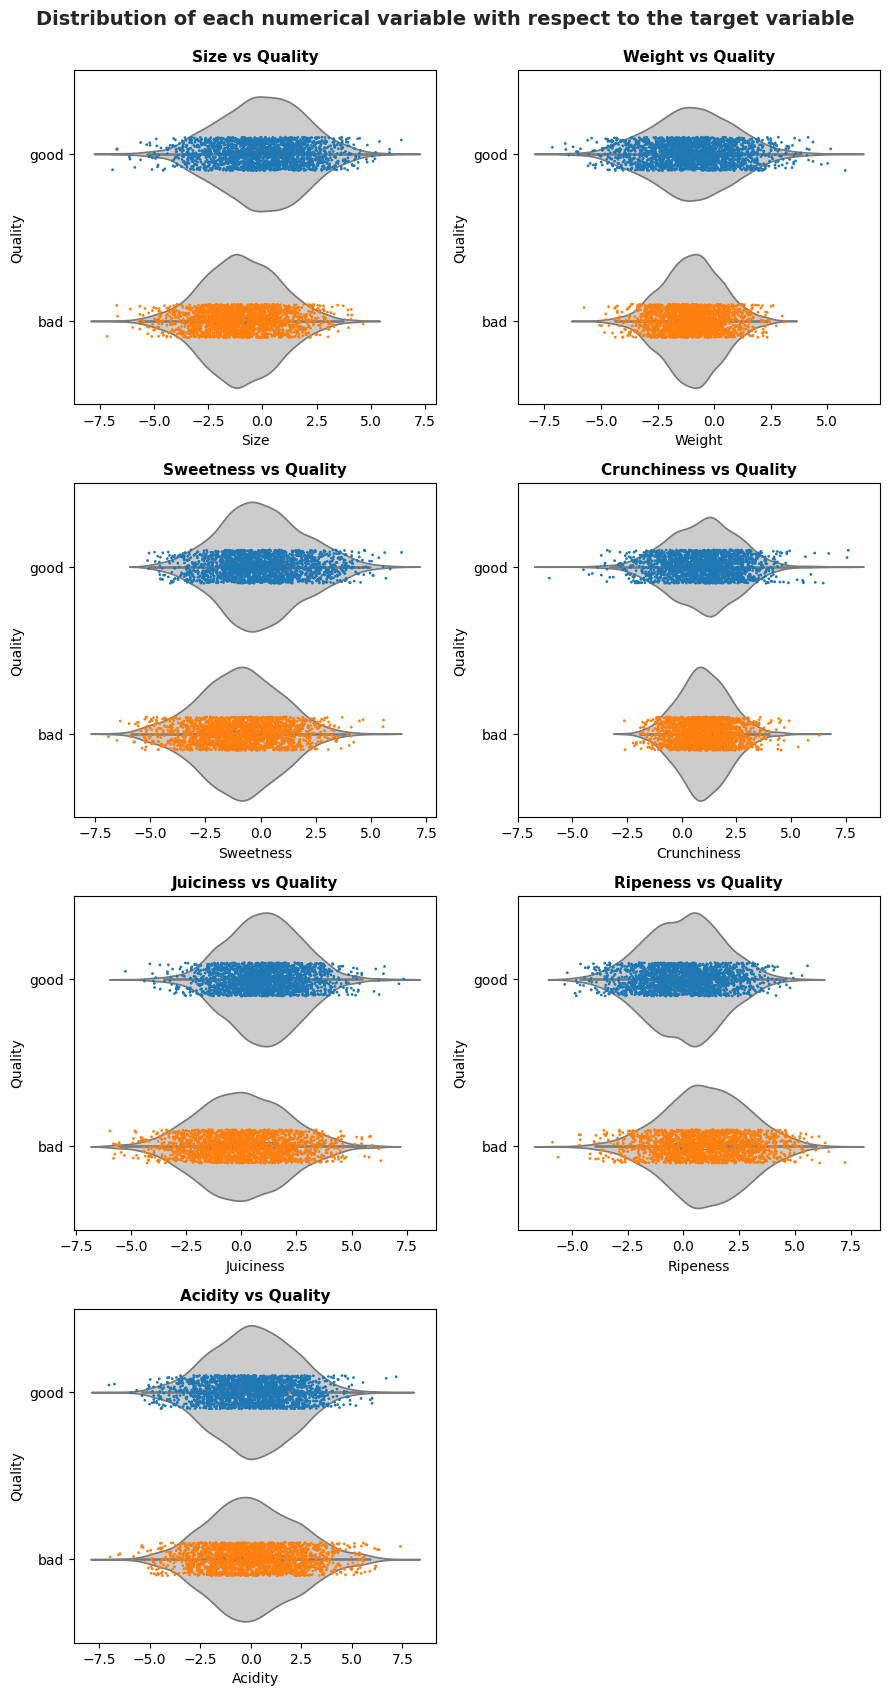

In [ ]:
fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (9,17))
sns.set_style('darkgrid')
axs = axs.flat

for i,col in enumerate(cols):
    sns.violinplot(data, x = col, y = 'Quality',color = '.8', ax = axs[i])
    sns.stripplot(data, x = col, y = 'Quality', size = 2, jitter  = 0.1, hue = 'Quality', ax = axs[i])
    axs[i].set_title(f'{col} vs Quality', fontsize = 11, fontweight = "bold")

fig.suptitle("Distribution of each numerical variable with respect to the target variable", fontsize = 14, fontweight = 'bold', y = 0.995)
fig.delaxes(ax = axs[7])
fig.tight_layout()
fig.show()


**Multivariate Analysis**

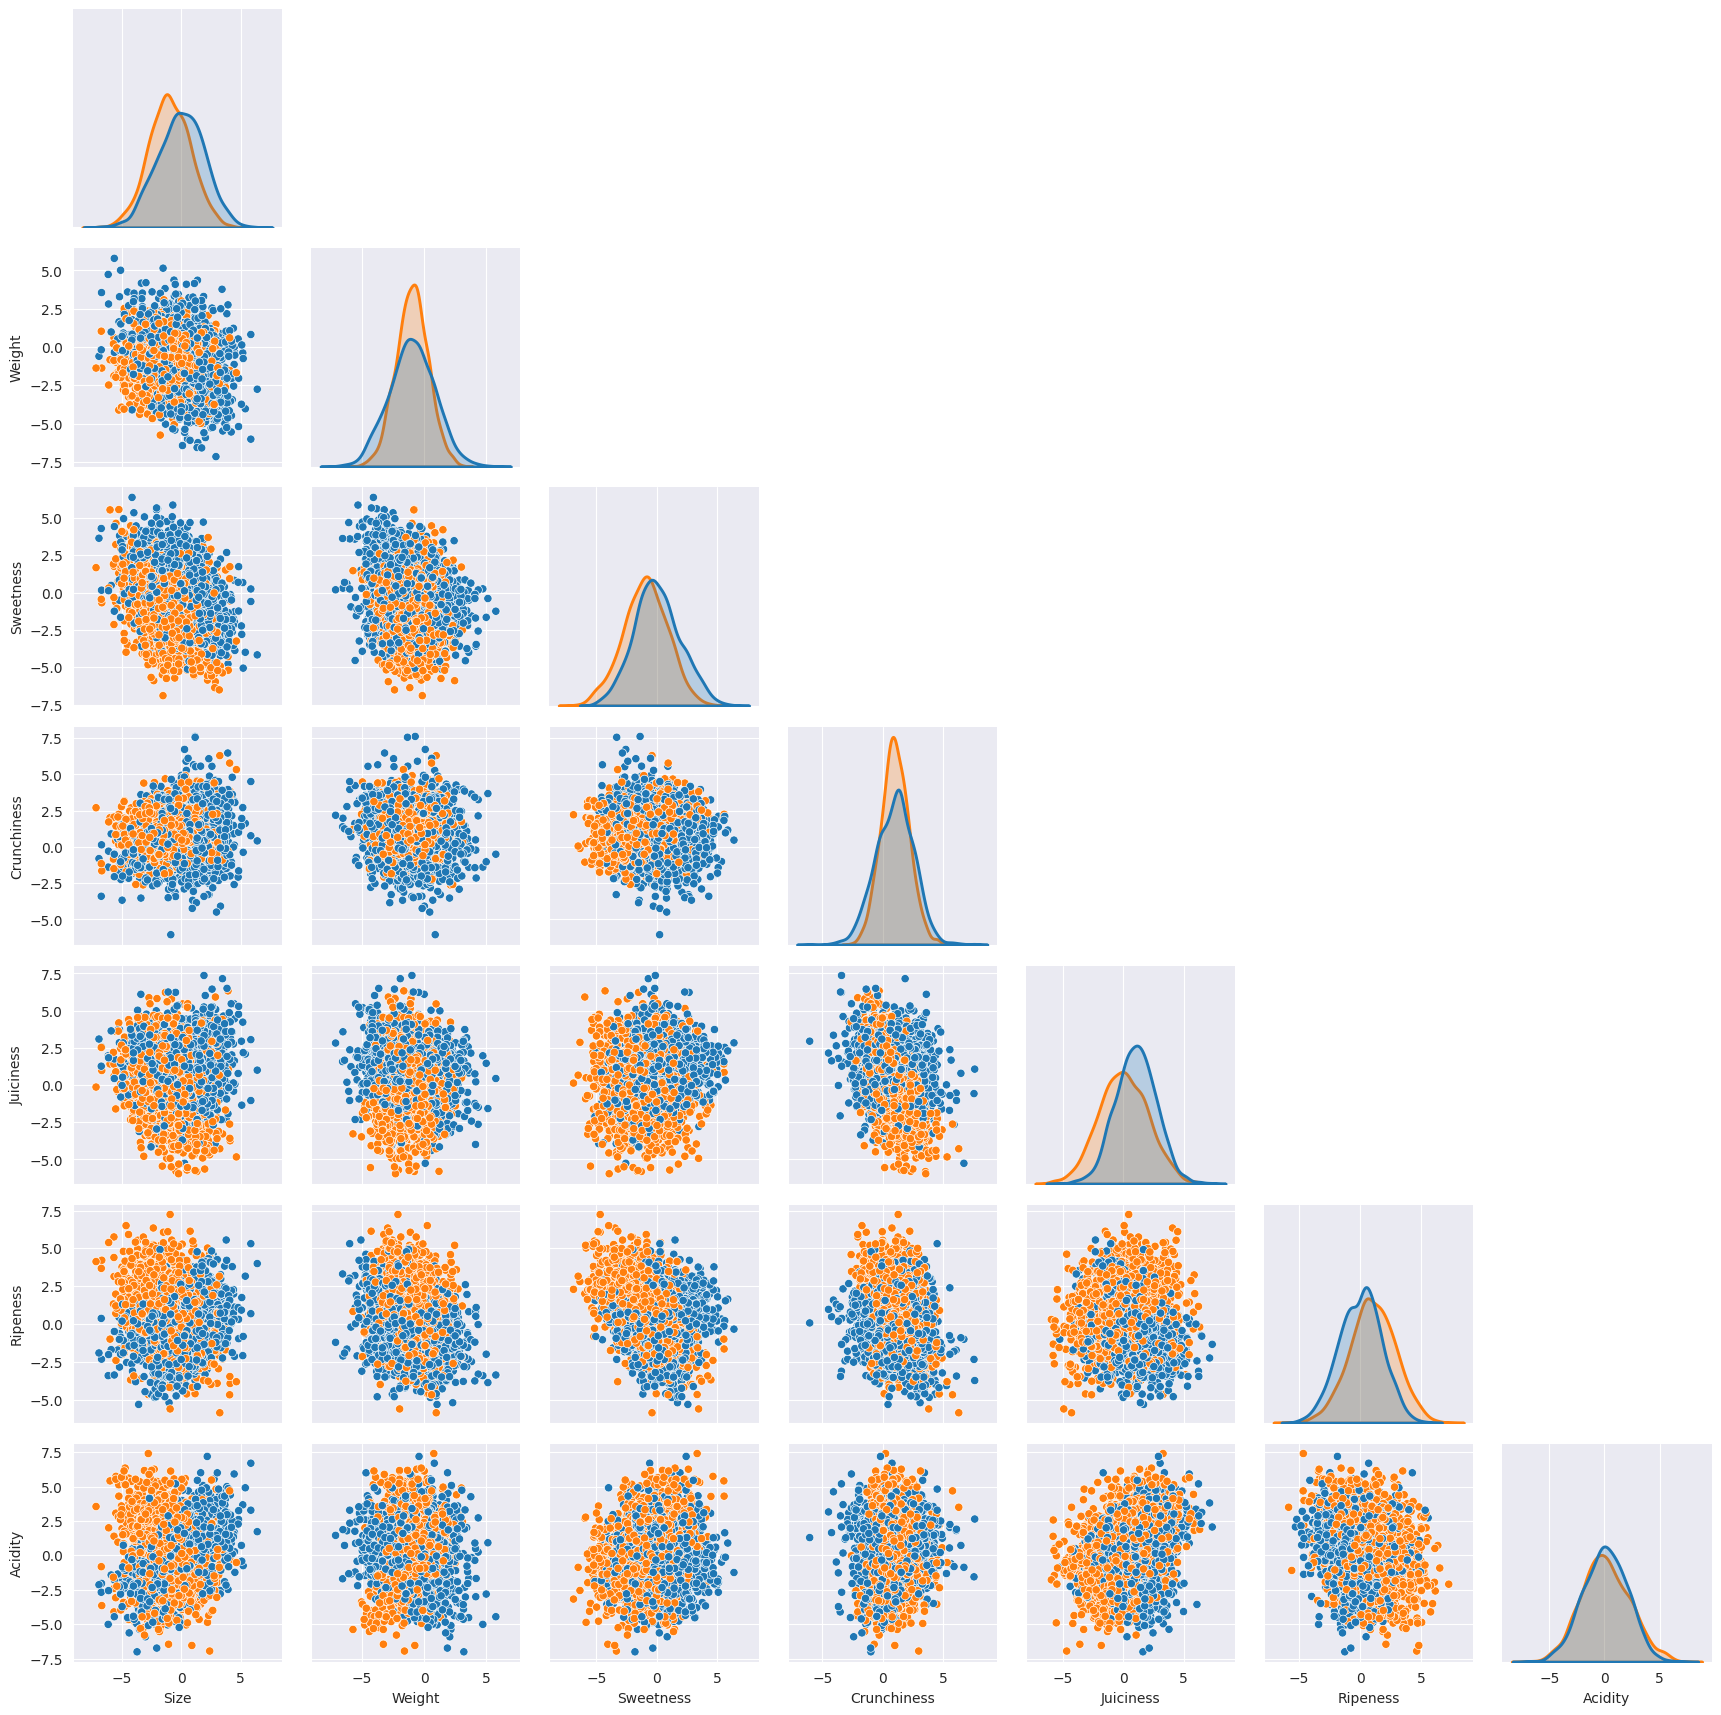

In [ ]:
g = sns.PairGrid(data, hue = 'Quality', corner = True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, fill = True, linewidth = 2.1)
g.fig.show()

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   

             Ripeness  
A_id         0.000742  
Size        -0.134773  
Weight      -0.243824  
Sweetness   -0.273800  
Crunchiness -0.201982  
Juiciness   -0.097144  
Ripeness     1.000000

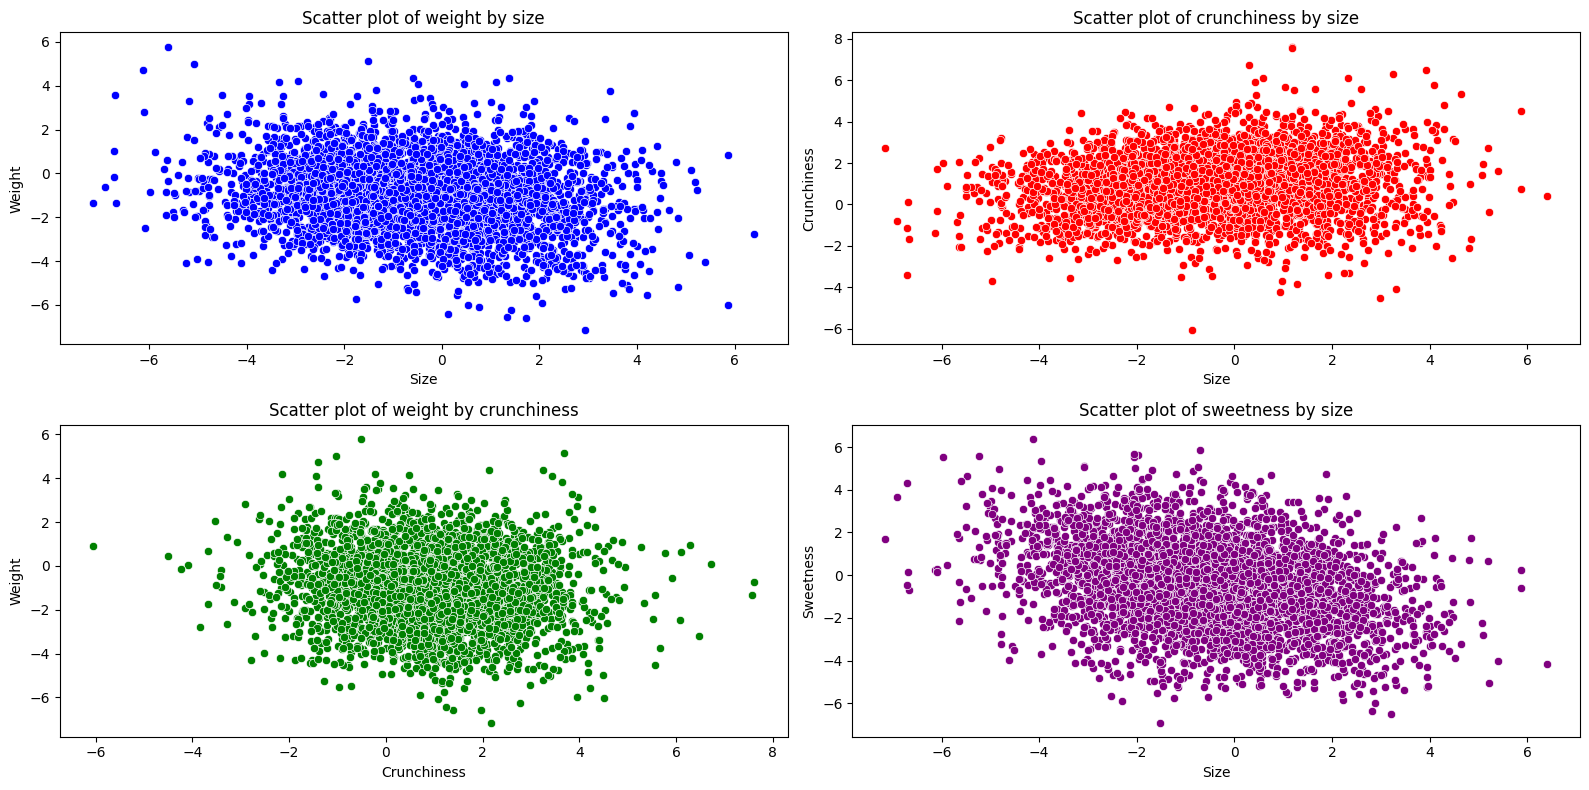

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

axes[0, 0].set_title("Scatter plot of weight by size")
sns.scatterplot(x='Size', y='Weight', ax=axes[0, 0], data=df, color = 'blue')

axes[0, 1].set_title("Scatter plot of crunchiness by size")
sns.scatterplot(x='Size', y='Crunchiness', ax=axes[0, 1], data=df, color = 'red')

axes[1, 0].set_title("Scatter plot of weight by crunchiness")
sns.scatterplot(x='Crunchiness', y='Weight', ax=axes[1, 0], data=df, color = 'green')

axes[1, 1].set_title("Scatter plot of sweetness by size")
sns.scatterplot(x='Size', y='Sweetness', ax=axes[1, 1], data=df, color ='purple')

plt.tight_layout()


plt.show()


### **Preprocessing**

In [ ]:
# We convert the target variable to binary.
#=======================================================
label2id = {'bad':0., 'good':1.}

data['Quality'] = data['Quality'].map(label2id)

In [ ]:
# Separate our data set into independent variables (X) and target variable (y).
#=================================================================================
X = data.drop('Quality', axis = 1)
y = data['Quality']

Now we divide into training and testing:

* train = 80%
* test = 20%

In [ ]:
SEED = 42

X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size = 0.2,
                                       random_state = SEED)

In [ ]:
y_train.value_counts()

Quality
1.0    1605
0.0    1595
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Quality
0.0    401
1.0    399
Name: count, dtype: int64

**Summary**
I selected the Apple data set from the kaggle plateform which contains various aspect of Apple's like Size, Weight, Sweetness,Crunchiness,Acidity,Juciness,Quality.

loaded the data set into a pandas data frame for easy manuplation and for various Analysis

Explored the data set dimensions checking the number of rows and columns investigating the data for missing values an handeled them appropriately ,ensuring data integrity.

Creating new columns findinf minimum and maximum range , average ,sum and count for various coulumns.

Utilized histogram to explore the distribution of key neumeric variable, revealing trends and patterns.

Employed scatter plot and bar charts to explore relationships between different columns. Throught the analysis , Pandas was used for data manipiulation, Matplotlib for visulatization and numpy for neumeric computations.Each step contributed to a comprehensive understanding of the apple dataset, allowing for meaningful insight and conclusion